In [ ]:
#importing packages
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler #importing standard scaler module
from sklearn.metrics import silhouette_samples, silhouette_score # importing silhouette_samples and score
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: PCA:
The ‘Hair Salon.csv’View in a new window dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study according to the instructions given in the rubric. Kindly refer to the PCA_Data_Dictionary.jpgView in a new window file for the Data Dictionary of the Dataset.  
Note: This particular dataset contains the target variable satisfaction as well. Please do drop this variable before doing Principal Component Analysis.

In [ ]:
df1=pd.read_csv(r'C:/Users/z0126520/Documents/Python/GL/Week 15_Project/Extended Project/Hair Salon.csv')

In [ ]:
df1.head()

In [ ]:
df1.shape

In [ ]:
df1.isnull().sum()

In [ ]:
df1.info()

In [ ]:
df1.describe()

### 1.PCA: Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

In [ ]:
#univariate analysis
def univariateAnalysis_numeric(column,nbins):

    plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.title('Histogram'+ column)
    sns.distplot(df1[column], kde=True, color='g'); 
    plt.subplot(222)
    plt.title('Boxplot'+ column)
    ax = sns.boxplot(x=df1[column])
    plt.show()

In [ ]:
for i in df1.columns:
    univariateAnalysis_numeric(i,20)

In [ ]:
df1.head(0)

In [ ]:
#bivariate analysis
df1_new = df1.copy()
df1_new.drop(['ID'],axis=1, inplace=True)


In [ ]:
sns.pairplot(df1_new)

In [ ]:
corr = df1_new.corr()

In [ ]:
plt.figure(figsize = (10,10))
matrix = np.triu(corr)
sns.heatmap(df1_new.corr(), annot=True,fmt='.2f', mask=matrix)

### 2.PCA: Scale the variables and write the inference for using the type of scaling function for this case study.

In [ ]:
from scipy.stats import zscore
df1_scaled=df1_new.apply(zscore)
df1_scaled.head()

### 3.PCA: Comment on the comparison between covariance and the correlation matrix after scaling.

In [ ]:
df1_new.corr()

In [ ]:
df1_new.cov()

In [ ]:
df1_scaled.corr()

In [ ]:
df1_scaled.cov()

### 4.PCA: Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

In [ ]:
def boxplot(column):

    plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.title('Boxplot before scaling'+ ' '+ column)
    ax = sns.boxplot(x=df1_new[column])
    plt.subplot(222)
    plt.title('Boxplot after scaling'+ ' ' + column)
    ax = sns.boxplot(x=df1_scaled[column])
    plt.show()

In [ ]:
for i in df1_new.columns:
    boxplot(i)

### 5.PCA: Build the covariance matrix, eigenvalues and eigenvector.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1_scaled)
p_value

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1_scaled)
kmo_model

In [ ]:
df1_scaled.drop(['Satisfaction'],axis=1,inplace=True)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11, random_state=123)
pca_transformed = pca.fit_transform(df1_scaled)

In [ ]:
#Eigen vectors
pca.components_

In [ ]:
#Eigen values
pca.explained_variance_

In [ ]:
#Covariance matrix
pca.explained_variance_ratio_

### 6.PCA: Write the explicit form of the first PC (in terms of Eigen Vectors).

In [ ]:
for i in range(0,11):
    print("(",np.round(pca.components_[0][i],2),")",'*',df1_scaled.columns[i], end=' + ')

### 7.PCA: Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [ ]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,12),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
#extraction of PC scores in a dataframe
y="PC"
x=[]
for i in range (0,11):
    x.append("{}{}".format(y,i+1))
x

In [ ]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = x,
                                    index = df1_scaled.columns)

In [ ]:
df_extracted_loadings

### 8.PCA: Mention the business implication of using the Principal Component Analysis for this case study.

In [ ]:
df1_PCA = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4']]
df1_PCA

In [ ]:
#Compare how the original features influence various PCs
plt.figure(figsize = (10,10))
sns.heatmap(abs(df1_PCA), annot = True, cmap = 'Blues',fmt = '.2f');

## Part 2: Clustering:
Dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.


In [113]:
df2=pd.read_csv(r'C:/Users/z0126520/Documents/Python/GL/Week 15_Project/Extended Project/State_wise_Health_income-1.csv')

### 1.Clustering: Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc)

In [114]:
df2.head()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


In [118]:
df2.shape

(297, 6)

In [115]:
df2.isnull().sum()

Unnamed: 0           0
States               0
Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
Unnamed: 0           297 non-null int64
States               297 non-null object
Health_indeces1      297 non-null int64
Health_indices2      297 non-null int64
Per_capita_income    297 non-null int64
GDP                  297 non-null int64
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


In [117]:
df2.describe()

,Unnamed: 0,Health_indeces1,Health_indices2,Per_capita_income,GDP
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,148.000000,2630.151515,693.632997,2156.915825,174601.117845
std,85.880731,2038.505431,468.944354,1491.854058,167167.992863
min,0.000000,-10.000000,0.000000,500.000000,22.000000
25%,74.000000,641.000000,175.000000,751.000000,8721.000000
50%,148.000000,2451.000000,810.000000,1865.000000,137173.000000
75%,222.000000,4094.000000,1073.000000,3137.000000,313092.000000
max,296.000000,10219.000000,1508.000000,7049.000000,728575.000000


In [119]:
df2_graph=df2.copy()
df2_graph.drop(['Unnamed: 0','States'],axis=1, inplace=True)

In [136]:
#univariate analysis
def univariateAnalysis_numeric(column, nbins):

    plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.title('Histogram'+ ' '+column)
    sns.distplot(df2_graph[column], kde=True, color='g'); 
    plt.subplot(222)
    plt.title('Boxplot'+ ' '+ column)
    ax = sns.boxplot(x=df2_graph[column])
    plt.show()

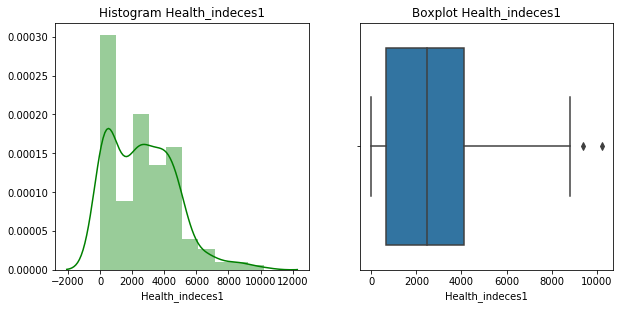

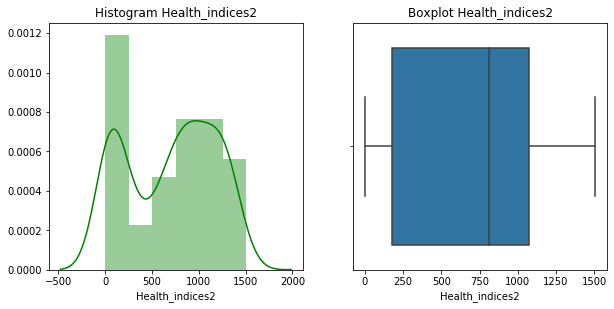

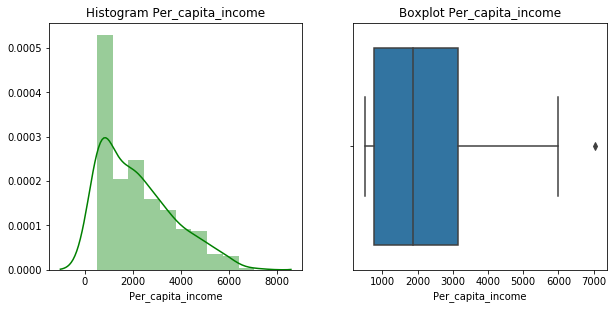

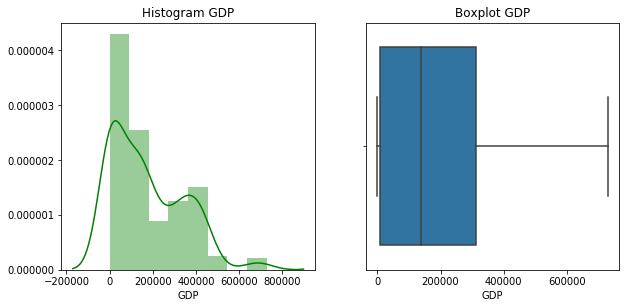

In [137]:
for i in df2_graph.columns:
    univariateAnalysis_numeric(i,20)

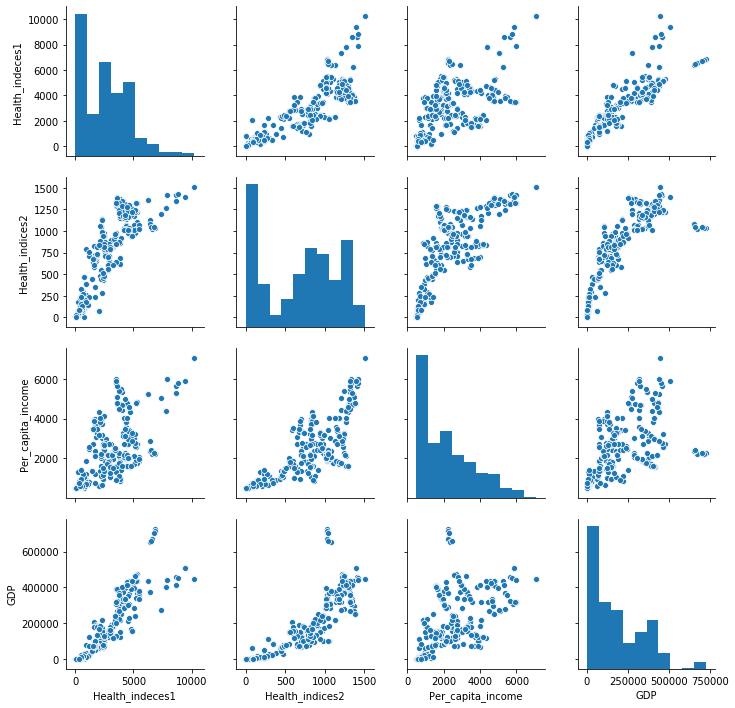

In [129]:
sns.pairplot(df2_graph)

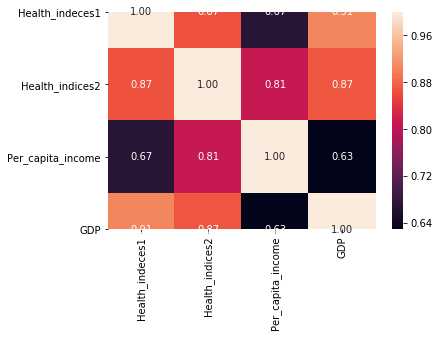

In [133]:
sns.heatmap(df2_graph.corr(), annot=True,fmt='.2f')

### 2.Clustering: Do you think scaling is necessary for clustering in this case? Justify.

In [138]:
from scipy.stats import zscore
df2_scaled=df2_graph.apply(zscore)
df2_scaled.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.087506,-1.340654,-1.069544,-1.035304
1,-0.562708,-0.101746,0.371362,-0.604838
2,-0.971048,-0.842955,-0.706968,-0.882536
3,-1.198067,-1.428232,-1.063502,-1.044730
4,-1.271283,-1.464545,-1.093716,-1.046096


### 3.Clustering: Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

In [139]:
from scipy.cluster.hierarchy import dendrogram, linkage
wardlink = linkage(df2_scaled, method = 'ward', metric= 'euclidean')

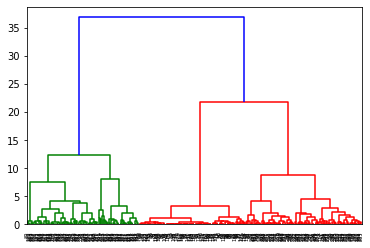

In [140]:
#dendrogram with ward
dend = dendrogram(wardlink)

### 4.Clustering: Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and find the silhouette score.

In [141]:
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df2_scaled)
    wss.append(KM.inertia_)

In [142]:
wss

[1188.0000000000002,
 471.35934639899375,
 260.57294083762304,
 183.6098397680126,
 149.787873629525,
 117.3192561524509,
 91.31804835544854,
 79.79633768915954,
 71.06763708986423,
 63.728636536275786]

In [143]:
a=[1,2,3,4,5,6,7,8,9,10]

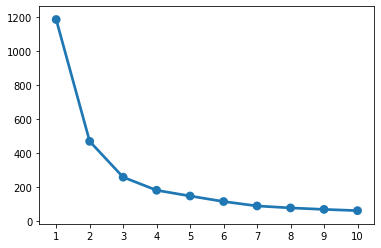

In [144]:
#Elbowplot
sns.pointplot(a, wss)

In [146]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df2_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(df2_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5309228403563753
Inertia = 471.35934639899375


In [147]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df2_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(df2_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5335432108748809
Inertia = 260.57294083762304


In [148]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df2_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(df2_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5520464132164421
Inertia = 183.6098397680126


In [149]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df2_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(df2_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5202576264700057
Inertia = 149.787873629525


In [150]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df2_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(df2_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5299734848941547
Inertia = 117.3192561524509


In [151]:
k_means = KMeans(n_clusters = 7,random_state=1)
k_means.fit(df2_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(df2_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5559503926370193
Inertia = 91.31804835544854


In [152]:
k_means = KMeans(n_clusters = 8,random_state=1)
k_means.fit(df2_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(df2_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5330116876400258
Inertia = 79.79633768915954


In [153]:
k_means = KMeans(n_clusters = 9,random_state=1)
k_means.fit(df2_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(df2_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5138048639003241
Inertia = 71.06763708986423


In [154]:
k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(df2_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(df2_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5114240736857556
Inertia = 63.728636536275786


### 5.Clustering: Describe cluster profiles for the clusters defined. Recommend different priority based actions that need to be taken for different clusters on the bases of their vulnerability situations according to their Economic and Health Conditions.